In [1]:
import sys
sys.path.insert(0,'/home/djl34/kl_git/scripts')
from notebook_imports import *

/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [2]:
client = Client()

# 1. Get Per-Footprint Info

In [48]:
filename = os.path.join(KL_data_dir, "results/method_validation/footprints/KL_freq_bin_9_pseudocount_0_chrom_{chrom}.tsv")

ddf = dd.read_csv([filename.format(chrom = chrom) for chrom in all_chrom_set], sep = "\t")
df = ddf.compute()
df = df.drop("Unnamed: 0", axis = 1)

filename = os.path.join(KL_data_dir, "results/method_validation/footprints/KL_freq_bin_2_pseudocount_0_chrom_{chrom}.tsv")
ddf = dd.read_csv([filename.format(chrom = chrom) for chrom in all_chrom_set], sep = "\t")
df_2 = ddf.compute()
df_2 = df_2.drop("Unnamed: 0", axis = 1)

df_merged = df.merge(df_2, on = "region", how = "inner", suffixes = ("_bin_9", "_bin_2"))

In [49]:
filename = os.path.join(KL_data_dir, "results/method_validation/footprints/pergene/mu_{chrom}.tsv")
ddf = dd.read_csv([filename.format(chrom = chrom) for chrom in all_chrom_set], sep = "\t")
df = ddf.compute()

df_merged = df_merged.merge(df, on = "region", how = "inner")

filename = os.path.join(KL_data_dir, "results/method_validation/footprints/pergene/zoonomia_{chrom}.tsv")
ddf = dd.read_csv([filename.format(chrom = chrom) for chrom in all_chrom_set], sep = "\t")
df = ddf.compute()

df_merged = df_merged.merge(df, on = "region", how = "inner")


# 2. Check for Footprints with many sites. Is there an error I should fix?

In [50]:
df_merged.sort_values("sites", ascending = False)

,region,max_likelihood_KL_bin_9,max_likelihood_KL_bin_2,predicted_mu,polymorphic,sites,phyloP_1_cutoff,phyloP_3_cutoff,phyloP_5_cutoff,phyloP_7_cutoff
466980,2.902408.4,0.005733,0.000000,5.544742e-06,106,723,144,27,3,0
1324993,5.258278.4,0.011722,0.000000,5.720134e-06,120,687,90,6,0,0
2310578,10.306366.5,0.034295,0.000926,5.577932e-06,99,677,70,0,0,0
1288970,5.664212.7,0.020161,0.008031,5.675575e-06,94,669,324,117,45,15
2889987,14.349358.7,0.012486,0.000000,3.758037e-06,90,638,66,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3267221,17.831718.1,0.330501,0.000000,1.766100e-08,1,1,0,0,0,0
466770,2.8696562.9,0.613284,0.613266,4.161500e-09,0,1,1,0,0,0
2132327,9.965788.2,0.613284,0.613266,4.161500e-09,0,1,0,0,0,0
2010752,8.852661.1,0.330530,0.000000,5.075000e-08,1,1,0,0,0,0


In [17]:
footprint_filename = os.path.join(KL_data_dir, "footprints/consensus_footprints_and_collapsed_motifs_hg38.bed.gz")
fp_header = ['Chrom', 'start', 'end', 'identifier', 'mean_signal', 'num_samples', 'num_fps', 'width', 'summit_pos', 'core_start', 'core_end', 'motif_clusters']
fp = pd.read_csv(footprint_filename, sep = "\t", names = fp_header)

## check 2.902408.4

In [8]:
chrom = 2
filename = os.path.join(KL_data_dir, f"results/method_validation/footprints/{chrom}.tsv")

df_sites = dd.read_csv(filename, sep = "\t", dtype={'Spliceai_info': 'object', 'DHS_tissue': 'object', 'footprint_motif_clusters': 'object'})

In [12]:
df_footprint = df_sites[df_sites["region"] == "2.902408.4"].compute()

df_footprint.sort_values("Pos", ascending = True, inplace = True)

In [19]:
fp[fp["identifier"] == "2.902408.4"]

,Chrom,start,end,identifier,mean_signal,num_samples,num_fps,width,summit_pos,core_start,core_end,motif_clusters
2349296,chr2,215958276,215958543,2.902408.4,142.770634,10,50,267,215958419,215958283.0,215958541.0,AP1/1;AP1/2;CCAAT/CEBP;CREB/ATF/2;CREB/ATF/3;D...


It is actually a very long footprint

## check 5.258278.4

In [21]:
identifier = "5.258278.4"

In [20]:
chrom = 5
filename = os.path.join(KL_data_dir, f"results/method_validation/footprints/{chrom}.tsv")

df_sites = dd.read_csv(filename, sep = "\t", dtype={'Spliceai_info': 'object', 'DHS_tissue': 'object', 'footprint_motif_clusters': 'object'})

In [22]:
fp[fp["identifier"] == identifier]

,Chrom,start,end,identifier,mean_signal,num_samples,num_fps,width,summit_pos,core_start,core_end,motif_clusters
3212954,chr5,31913530,31913759,5.258278.4,172.431685,21,57,229,31913661,31913532.0,31913766.0,AP1/1;AP1/2;E2F/2;ETS/2;FOX/4;GLI;HD/18;HD/24;...


# 3. filter by number of sites and total mutation rate

<AxesSubplot:xlabel='sites', ylabel='Count'>

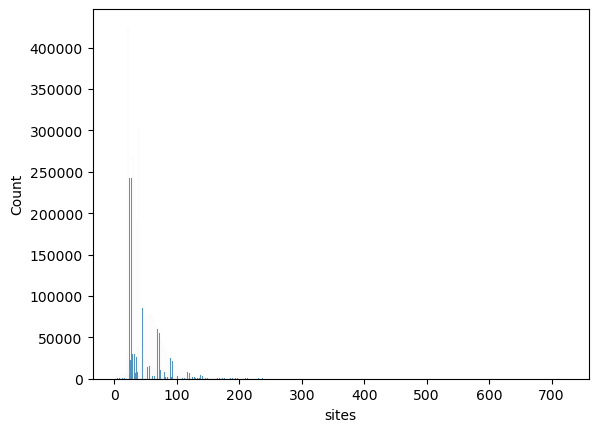

In [24]:
sns.histplot(data=df_merged, x="sites")

<AxesSubplot:xlabel='predicted_mu', ylabel='Count'>

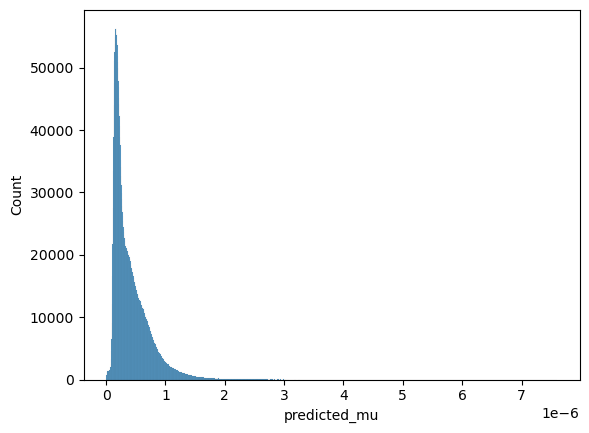

In [25]:
sns.histplot(data=df_merged, x="predicted_mu")

In [37]:
## do number of sites by 20, this keeps most sites anyways

In [98]:
## do sites cutoff
cutoff = 20

print(len(df_merged))
print(len(df_merged[df_merged["sites"] > cutoff]))
print(df_merged["sites"].mean())

df_merged_cutoff = df_merged[df_merged["sites"] > cutoff]

3759129
3676565
47.06491530351845


In [110]:
## do sites cutoff
mu_cutoff = 4e-07

print(len(df_merged_cutoff))
print(len(df_merged_cutoff[df_merged_cutoff["predicted_mu"] > mu_cutoff]))
print(df_merged_cutoff["predicted_mu"].mean())

df_merged_cutoff = df_merged_cutoff[df_merged_cutoff["predicted_mu"] > mu_cutoff]

2666609
1441619
5.137211985652938e-07


In [111]:
df_merged_cutoff.sort_values("max_likelihood_KL_bin_9", ascending = True)

,region,max_likelihood_KL_bin_9,max_likelihood_KL_bin_2,predicted_mu,polymorphic,sites,phyloP_1_cutoff,phyloP_3_cutoff,phyloP_5_cutoff,phyloP_7_cutoff,phyloP_1_cutoff_fraction,phyloP_3_cutoff_fraction,phyloP_5_cutoff_fraction,phyloP_7_cutoff_fraction
1442647,6.251551.4,1.847578e-16,0.000000,5.457655e-07,10,45,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1445045,6.659349.3,1.847578e-16,0.000000,6.623890e-07,9,42,21,3,3,0,0.500000,0.071429,0.071429,0.000000
3593747,20.542673.5,1.847578e-16,0.000000,4.207175e-07,15,50,41,29,12,6,0.820000,0.580000,0.240000,0.120000
3122611,16.88267.7,1.847578e-16,0.000000,1.413083e-06,16,49,0,0,0,0,0.000000,0.000000,0.000000,0.000000
3758278,22.908023.3,1.847578e-16,0.000000,5.941810e-07,13,57,6,0,0,0,0.105263,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283691,1.9264462.1,6.139510e-01,0.613952,5.489120e-07,0,39,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2360518,10.299736.4,6.139510e-01,0.613950,4.137140e-07,0,63,3,0,0,0,0.047619,0.000000,0.000000,0.000000
927004,3.7118509.7,6.139513e-01,0.613949,4.375665e-07,0,66,3,0,0,0,0.045455,0.000000,0.000000,0.000000
3092963,15.444345.7,6.139513e-01,0.613954,1.220944e-06,0,26,3,0,0,0,0.115385,0.000000,0.000000,0.000000


In [43]:
## check that top KL bins actually have similar mean mu as rest of the pile. This seems good!

In [112]:
df_merged_cutoff[np.isclose(df_merged_cutoff["max_likelihood_KL_bin_9"], 6.139555e-01, atol = 0.01)]["predicted_mu"].mean()

5.08544e-07

# 4. Validate on Zoonomia Values

In [113]:
zoonomia_columns = [f"phyloP_{value}_cutoff" for value in range(1, 9, 2)]

In [114]:
zoonomia_columns

['phyloP_1_cutoff', 'phyloP_3_cutoff', 'phyloP_5_cutoff', 'phyloP_7_cutoff']

In [115]:
df_merged_cutoff.sort_values("max_likelihood_KL_bin_9", ascending = False, inplace = True)

In [116]:
df_merged_cutoff[zoonomia_columns].sum()/df_merged_cutoff["sites"].sum()

phyloP_1_cutoff    0.217466
phyloP_3_cutoff    0.069129
phyloP_5_cutoff    0.028543
phyloP_7_cutoff    0.009833
dtype: float64

In [117]:
for x in zoonomia_columns:
    df_merged_cutoff[x + "_fraction"] = df_merged_cutoff[x]/df_merged_cutoff["sites"]

In [152]:
len(df_merged_cutoff[df_merged_cutoff["max_likelihood_KL_bin_2"] > 1e-2])/len(df_merged_cutoff)

0.2875302004204994

In [ ]:
pandas.DataFrame.quantile

## check for top KL value

In [118]:
df_merged_cutoff_top = df_merged_cutoff[np.isclose(df_merged_cutoff["max_likelihood_KL_bin_9"], 6.139555e-01, atol = 0.01)]

len(df_merged_cutoff_top)

35

In [119]:
print(df_merged_cutoff_top["sites"].sum())

df_merged_cutoff_top[zoonomia_columns].sum()/df_merged_cutoff_top["sites"].sum()

1561


phyloP_1_cutoff    0.224856
phyloP_3_cutoff    0.100577
phyloP_5_cutoff    0.039078
phyloP_7_cutoff    0.007687
dtype: float64

In [120]:
df_merged_cutoff_top[df_merged_cutoff_top["phyloP_7_cutoff"] > 0]

,region,max_likelihood_KL_bin_9,max_likelihood_KL_bin_2,predicted_mu,polymorphic,sites,phyloP_1_cutoff,phyloP_3_cutoff,phyloP_5_cutoff,phyloP_7_cutoff,phyloP_1_cutoff_fraction,phyloP_3_cutoff_fraction,phyloP_5_cutoff_fraction,phyloP_7_cutoff_fraction
1810302,7.840436.5,0.613955,0.613955,1.649273e-06,0,66,39,39,15,6,0.590909,0.590909,0.227273,0.090909
3116084,16.85545.7,0.613949,0.613948,4.093495e-07,0,43,21,9,3,3,0.488372,0.209302,0.069767,0.069767
559030,2.329876.1,0.613948,0.613949,4.174695e-07,0,36,27,15,6,3,0.750000,0.416667,0.166667,0.083333


## check for top N value

In [133]:
n = 1000
df_merged_cutoff_top = df_merged_cutoff.iloc[0:n]

print(df_merged_cutoff_top["sites"].sum())

df_merged_cutoff_top[zoonomia_columns].sum()/df_merged_cutoff_top["sites"].sum()

30823


phyloP_1_cutoff    0.186484
phyloP_3_cutoff    0.060961
phyloP_5_cutoff    0.026668
phyloP_7_cutoff    0.010122
dtype: float64

doesn't seem to work?

## Maybe find footprints with high proportion of zoonomia values?

In [123]:
df_merged_cutoff.sort_values("phyloP_7_cutoff_fraction", ascending = False)

,region,max_likelihood_KL_bin_9,max_likelihood_KL_bin_2,predicted_mu,polymorphic,sites,phyloP_1_cutoff,phyloP_3_cutoff,phyloP_5_cutoff,phyloP_7_cutoff,phyloP_1_cutoff_fraction,phyloP_3_cutoff_fraction,phyloP_5_cutoff_fraction,phyloP_7_cutoff_fraction
3252611,17.533471.2,8.441058e-02,0.002579,5.310480e-07,10,42,42,42,42,39,1.000000,1.000000,1.000000,0.928571
2206755,10.650505.3,1.058497e-02,0.000000,5.515510e-07,13,26,26,26,24,24,1.000000,1.000000,0.923077,0.923077
3614677,20.74248.2,1.012455e-02,0.000000,5.934705e-07,14,46,46,46,44,41,1.000000,1.000000,0.956522,0.891304
717867,3.33589.4,3.053031e-02,0.000000,4.631445e-07,9,27,27,24,24,24,1.000000,0.888889,0.888889,0.888889
3724818,22.772118.3,1.012424e-02,0.000000,4.876060e-07,10,27,27,25,25,24,1.000000,0.925926,0.925926,0.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748671,12.8144616.4,5.155725e-02,0.000000,4.959290e-07,14,68,6,0,0,0,0.088235,0.000000,0.000000,0.000000
1973258,8.1516834.7,5.155726e-02,0.000000,8.434650e-07,20,78,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2678253,12.709847.4,5.155731e-02,0.000000,7.548555e-07,11,54,0,0,0,0,0.000000,0.000000,0.000000,0.000000
3017433,15.664849.7,5.155731e-02,0.004718,8.299655e-07,16,138,51,18,6,0,0.369565,0.130435,0.043478,0.000000


In [134]:
df_merged_cutoff_highphyloP = df_merged_cutoff[df_merged_cutoff["phyloP_7_cutoff_fraction"] > 0.5]

In [135]:
df_merged_cutoff_highphyloP[df_merged_cutoff_highphyloP["max_likelihood_KL_bin_2"] == 0]

,region,max_likelihood_KL_bin_9,max_likelihood_KL_bin_2,predicted_mu,polymorphic,sites,phyloP_1_cutoff,phyloP_3_cutoff,phyloP_5_cutoff,phyloP_7_cutoff,phyloP_1_cutoff_fraction,phyloP_3_cutoff_fraction,phyloP_5_cutoff_fraction,phyloP_7_cutoff_fraction
938836,3.619333.5,4.262609e-01,0.455844,6.547765e-07,2,29,29,26,26,18,1.000000,0.896552,0.896552,0.620690
2501295,11.679499.4,4.138070e-01,0.442402,6.260520e-07,2,33,27,24,24,18,0.818182,0.727273,0.727273,0.545455
98687,1.664172.4,4.114238e-01,0.425380,5.726630e-07,2,24,24,18,15,15,1.000000,0.750000,0.625000,0.625000
1457982,6.6528767.4,3.970549e-01,0.315015,5.072970e-07,2,60,57,54,48,33,0.950000,0.900000,0.800000,0.550000
3662679,21.419723.1,3.750766e-01,0.442182,6.173230e-07,2,21,21,21,21,18,1.000000,1.000000,1.000000,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351991,2.756059.4,1.847578e-16,0.000000,4.139170e-07,10,44,38,26,26,23,0.863636,0.590909,0.590909,0.522727
3250363,17.122428.4,1.847578e-16,0.000000,4.164545e-07,10,39,39,36,30,24,1.000000,0.923077,0.769231,0.615385
890374,3.870534.4,1.847578e-16,0.000000,7.437920e-07,59,76,76,76,67,42,1.000000,1.000000,0.881579,0.552632
2147094,9.324808.4,1.847578e-16,0.000000,1.098839e-06,15,57,51,51,45,33,0.894737,0.894737,0.789474,0.578947


In [155]:
df_merged_cutoff_highphyloP[df_merged_cutoff_highphyloP["max_likelihood_KL_bin_2"] == 0]

,region,max_likelihood_KL_bin_9,max_likelihood_KL_bin_2,predicted_mu,polymorphic,sites,phyloP_1_cutoff,phyloP_3_cutoff,phyloP_5_cutoff,phyloP_7_cutoff,phyloP_1_cutoff_fraction,phyloP_3_cutoff_fraction,phyloP_5_cutoff_fraction,phyloP_7_cutoff_fraction,max_likelihood_KL_bin_9_log,max_likelihood_KL_bin_2_log
115501,1.26125.4,2.309483e-01,0.0,4.069135e-07,10,36,36,36,27,21,1.000000,1.000000,0.750000,0.583333,-0.636485,-inf
3555203,20.377225.7,2.009445e-01,0.0,4.123945e-07,7,35,29,29,20,20,0.828571,0.828571,0.571429,0.571429,-0.696924,-inf
3719211,22.848175.3,1.569068e-01,0.0,4.507615e-07,7,36,36,36,36,21,1.000000,1.000000,1.000000,0.583333,-0.804358,-inf
805569,3.375976.4,1.525751e-01,0.0,7.164885e-07,7,27,27,27,21,15,1.000000,1.000000,0.777778,0.555556,-0.816516,-inf
164,1.1244605.74,1.525720e-01,0.0,5.326720e-07,12,48,45,42,42,30,0.937500,0.875000,0.875000,0.625000,-0.816525,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351991,2.756059.4,1.847578e-16,0.0,4.139170e-07,10,44,38,26,26,23,0.863636,0.590909,0.590909,0.522727,-15.733397,-inf
3250363,17.122428.4,1.847578e-16,0.0,4.164545e-07,10,39,39,36,30,24,1.000000,0.923077,0.769231,0.615385,-15.733397,-inf
890374,3.870534.4,1.847578e-16,0.0,7.437920e-07,59,76,76,76,67,42,1.000000,1.000000,0.881579,0.552632,-15.733397,-inf
2147094,9.324808.4,1.847578e-16,0.0,1.098839e-06,15,57,51,51,45,33,0.894737,0.894737,0.789474,0.578947,-15.733397,-inf


In [150]:
df_merged_cutoff_highphyloP["max_likelihood_KL_bin_9_log"] = np.log10(df_merged_cutoff_highphyloP["max_likelihood_KL_bin_9"])
df_merged_cutoff_highphyloP["max_likelihood_KL_bin_2_log"] = np.log10(df_merged_cutoff_highphyloP["max_likelihood_KL_bin_2"])




/tmp/ipykernel_14003/1277385984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_cutoff_highphyloP["max_likelihood_KL_bin_9_log"] = np.log10(df_merged_cutoff_highphyloP["max_likelihood_KL_bin_9"])
/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_14003/1277385984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_cutoff_h

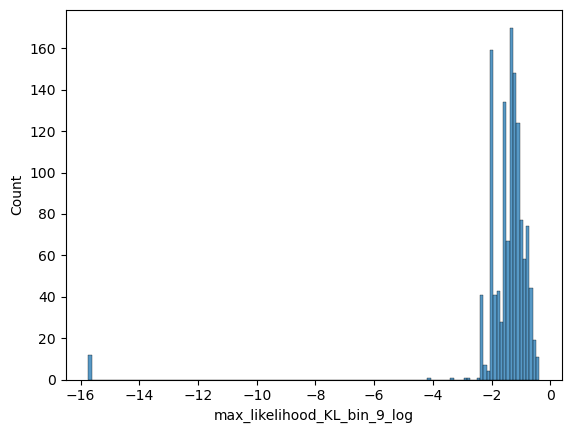

In [140]:
g = sns.histplot(data=df_merged_cutoff_highphyloP, x="max_likelihood_KL_bin_9_log")
# g.set(xscale='log')


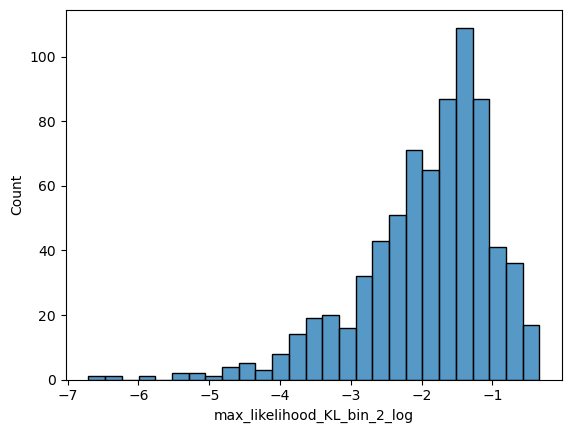

In [151]:
g = sns.histplot(data=df_merged_cutoff_highphyloP, x="max_likelihood_KL_bin_2_log")
# g.set(xscale='log')
